In [29]:
library(tidyverse)
library(repr)
library(dplyr)
library(tidymodels)
library(gridExtra)
library(cowplot)
options(repr.matrix.max.rows = 6)

In [30]:
tennis_data <- read_csv("https://raw.githubusercontent.com/keelbeier/dsci100-group69/main/atp2017-2019.csv")
tennis_data

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2883,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,2,104542,NA,⋯,54,30,12,12,5,11,15,2320,76,667
2884,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,4,105676,NA,⋯,54,44,13,14,7,10,7,3775,15,2320
2885,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,5,106298,NA,⋯,53,29,11,11,4,11,18,2235,76,667



Above: our csv file read into R

Now, we will wrangle our data into a tidy format. We will remove all columns that we do not need.

In [31]:
tennis_data <- tennis_data |>
                    select(tourney_date, 
                      winner_age, loser_age, winner_ht, minutes) |>
                    mutate(winner_age = round(winner_age)) |>
                    mutate(loser_age = round(loser_age))|>
                    filter(winner_ht != "NA")
tennis_data

tourney_date,winner_age,loser_age,winner_ht,minutes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20181231,29,23,178,124
20181231,29,32,178,66
20181231,34,20,188,106
⋮,⋮,⋮,⋮,⋮
20171124,33,34,188,106
20171124,27,33,163,164
20171124,24,34,185,94


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 73 rows containing non-finite values (stat_bin).”


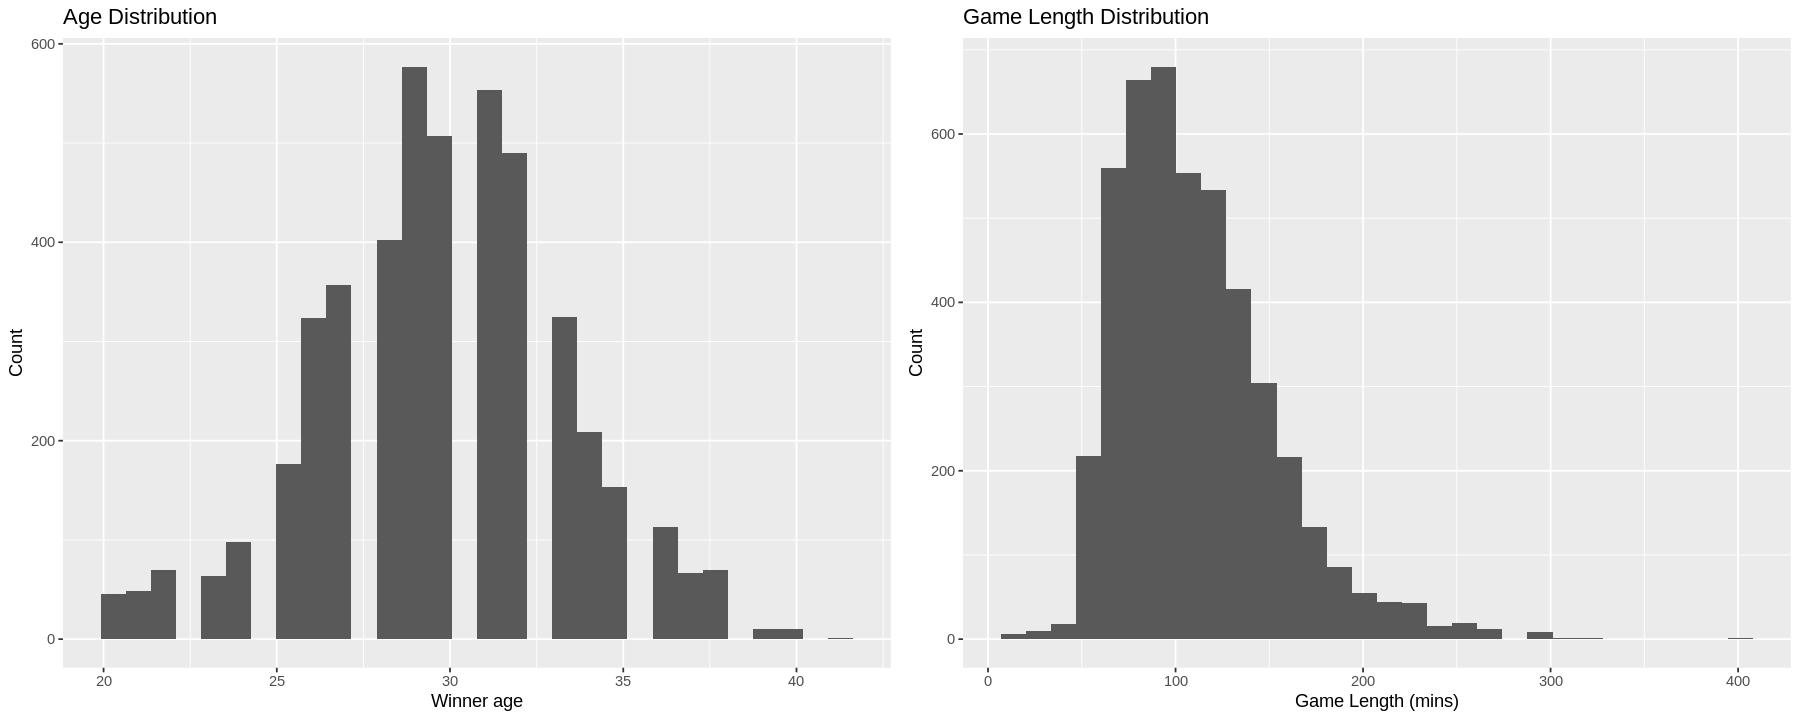

In [39]:
options(repr.plot.width=15, repr.plot.height=6)
age_plot <- tennis_data |> 
    ggplot(aes(x = winner_age)) +
    geom_histogram() +
    labs(x = "Winner age",
        y = "Count")+
    ggtitle("Age Distribution")

time_plot <- tennis_data |> 
    ggplot(aes(x = minutes)) +
    geom_histogram() +
    labs(x = "Game Length (mins)",
        y = "Count") +
    ggtitle("Game Length Distribution")

plot_grid(age_plot, time_plot, ncol = 2)

Warning message:
“Removed 73 rows containing missing values (geom_point).”
Warning message:
“Removed 73 rows containing missing values (geom_point).”


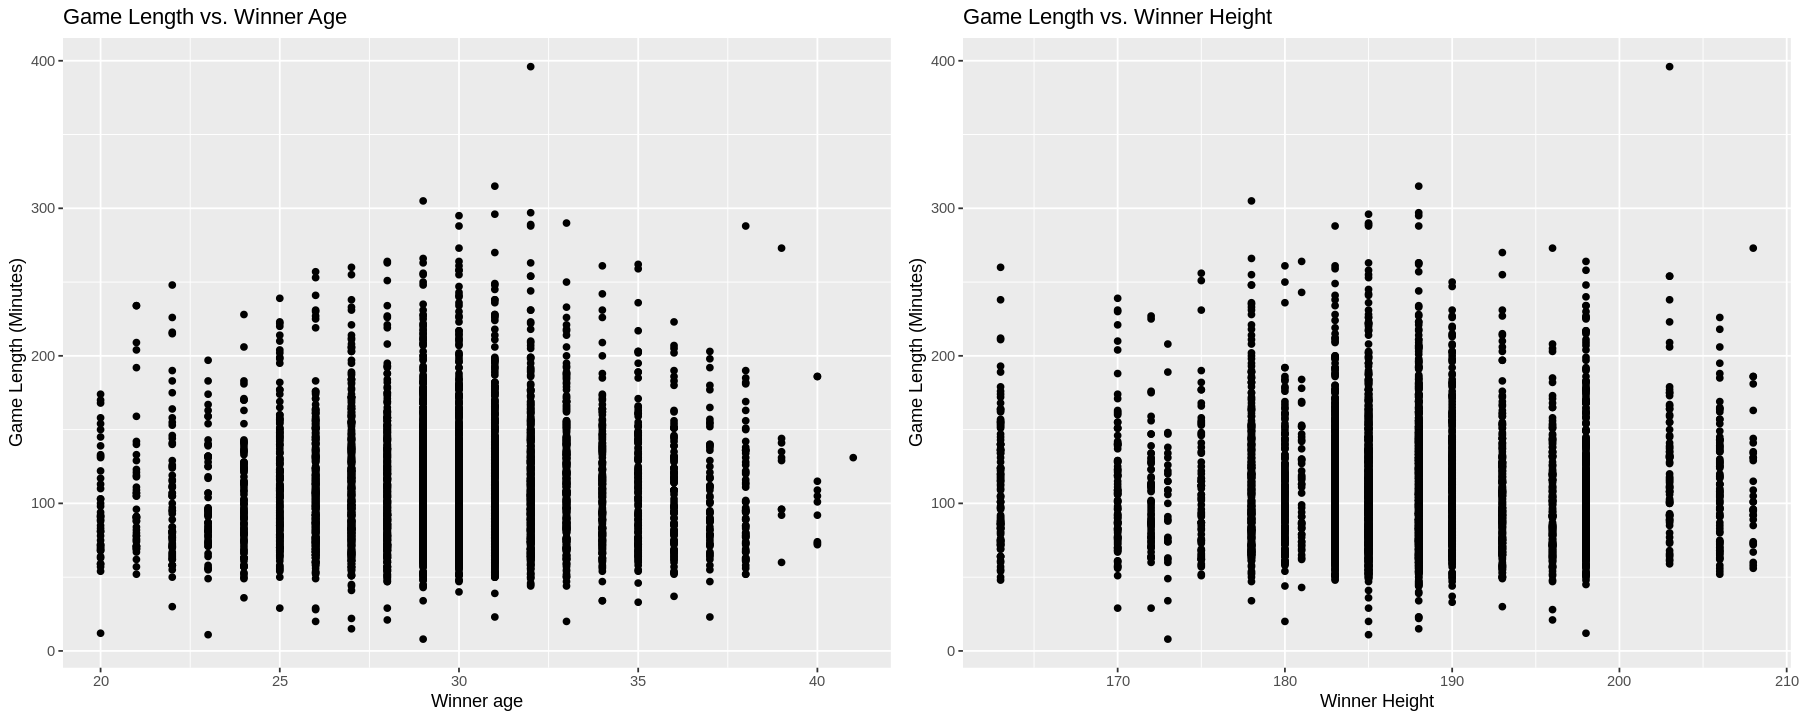

In [48]:
options(repr.plot.width=15, repr.plot.height=6)
age_scatter_plot <- tennis_data |> 
    ggplot(aes(x = winner_age, y = minutes)) +
    geom_point() +
    labs(x = "Winner age",
        y = "Game Length (Minutes)") +
    ggtitle("Game Length vs. Winner Age")


ht_scatter_plot <- tennis_data |> 
    ggplot(aes(x = winner_ht, y = minutes)) +
    geom_point() +
    labs(x = "Winner Height",
        y = "Game Length (Minutes)") +
    ggtitle("Game Length vs. Winner Height")

plot_grid(age_scatter_plot, ht_scatter_plot, ncol = 2)

In [34]:
data_split <- initial_split(tennis_data, prop = 0.6, strata = minutes)
data_train <- training(data_split)
data_test <- testing(data_split)

In [37]:
set.seed(2000)

lm_spec <- linear_reg()|>
    set_engine("lm")|>
    set_mode("regression")

lm_recipe <- recipe(minutes ~ winner_ht + winner_age, data = data_train)

lm_fit <- workflow()|>
    add_recipe(lm_recipe)|>
    add_model(lm_spec) |>
    fit(data = data_train)
lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)    winner_ht   winner_age  
  101.96458      0.00909      0.23887  


In [38]:
lm_test_result <- lm_fit |>
    predict(data_test) |>
    bind_cols(data_test) |>
    metrics(truth = minutes, estimate = .pred)
lm_test_result

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,41.765598283
rsq,standard,0.001898638
mae,standard,32.394836671


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 73 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 73 rows containing missing values (geom_point).”


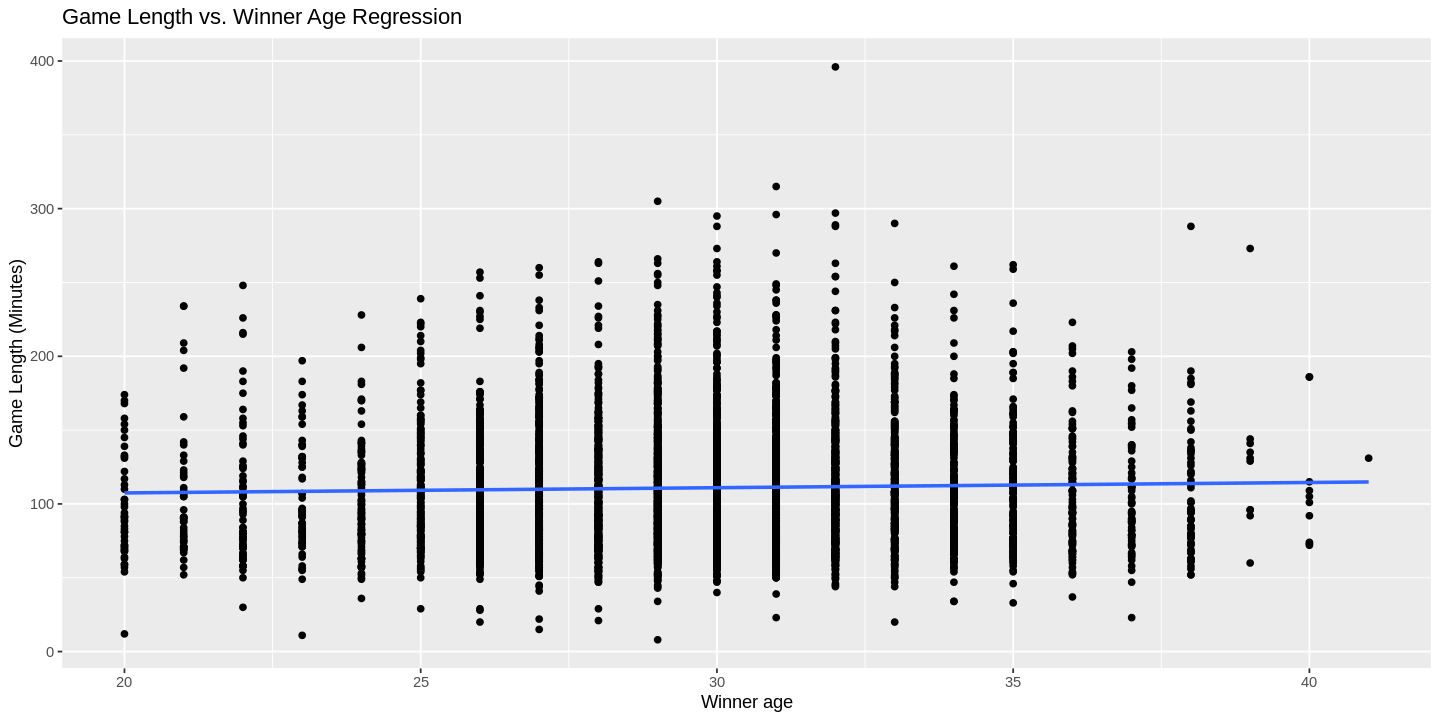

In [53]:
regression_age_plot <- age_scatter_plot + 
    geom_smooth(method = "lm", se = FALSE) + 
    ggtitle("Game Length vs. Winner Age Regression")
regression_age_plot

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 73 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 73 rows containing missing values (geom_point).”


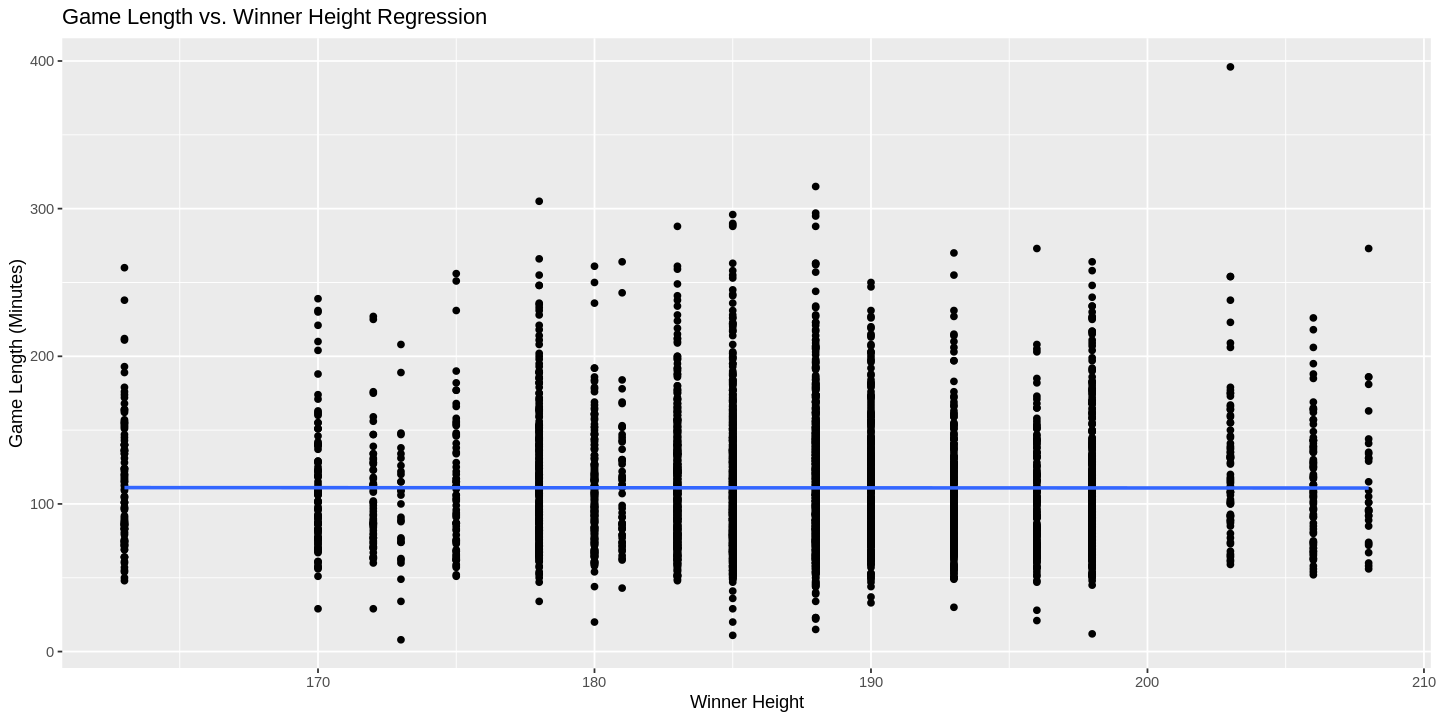

In [51]:
options(repr.plot.width=12, repr.plot.height=6)
regression_ht_plot <- ht_scatter_plot + 
    geom_smooth(method = "lm", se = FALSE) + 
    ggtitle("Game Length vs. Winner Height Regression")
regression_ht_plot